<a href="https://colab.research.google.com/github/alinaiil/ITMO-applied-mathematics-4sem/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполнили: Алина Ильясова, Воробьева Милана

Группа: М32021


---



Лабораторная работа # 1
"Численное дифференцирование и интегрирование"

Цели и задачи:
Реализовать различные методы интегрирования и дифференцирования. Сравнить результы методов для каждой задачи между собой и сравнить их с аналитически найденными результатами. Сделать выводы об этих методах, об их применимости, исходя из анализа погрешностей.

Задана функция f(x) на отрезке [a, b]. Продифференцируем её 3-мя методами численного дифференцирования.

1. Правая разностная производная

  $f'(x)≃\frac{f(x+h)-f(x)}{h}$

In [ ]:
import numpy as np


# нахождение производной в i-ом узле
def calculate_right_derivative_y_i(i, y, h):
    y_i_dif = (y[i + 1] - y[i]) / h
    return y_i_dif


# нахождение массива производных для всех узлов
def calculate_computational_right_derivative_dots_array(h, n, y):
    y_derivative_array = np.zeros(n)

    for i in range(0, n - 1):
        y_derivative_array[i] = calculate_right_derivative_y_i(i, y, h)

    return y_derivative_array


2. Левая разностная производная

  $f'(x)≃\frac{f(x)-f(x-h)}{h}$

In [ ]:
import numpy as np


# нахождение производной в i-ом узле
def calculate_left_derivative_y_i(i, y, h):
    y_i_dif = (y[i] - y[i - 1]) / h
    return y_i_dif


# нахождение массива производных для всех узлов
def calculate_computational_left_derivative_dots_array(h, n, y):
    y_derivative_array = np.zeros(n)

    for i in range(1, n):
        y_derivative_array[i] = calculate_left_derivative_y_i(i, y, h)

    return y_derivative_array

Чтобы посмотреть на методы в действии, протестируем их на 2х функциях и отобразим на графике вместе с аналитически найденной производной.


$f_1(x)=x^3arcsin(x)$

$f_1'=3x^2arcsin(x)+\frac{x^3}{\sqrt{1-x^2}}$

$f_2(x)=\sqrt[3]{x}*2^{cos(x)}$

$f_2'=\frac{2^{cos(x)}-3ln(2)2^{cos(x)}xsin(x)}{3\sqrt[3]{x^2}}$

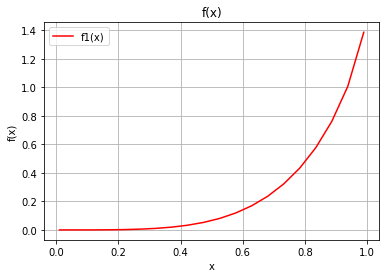

<Figure size 432x288 with 0 Axes>

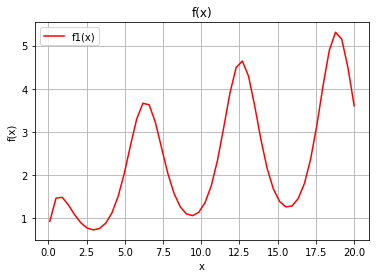

<Figure size 432x288 with 0 Axes>

In [ ]:
from numpy.ma.core import fromfunction
import matplotlib.pyplot as plt


def function_1(x_array):
    return x_array ** 3 * np.arcsin(x_array)


def analytic_derivative_1(x_array):
    return 3 * x_array ** 2 * np.arcsin(x_array) + (x_array ** 3 / np.sqrt(1 - x_array ** 2))


def function_2(x_array):
    return x_array ** (1 / 3) * 2 ** np.cos(x_array)


def analytic_derivative_2(x_array):
    return (2 ** np.cos(x_array) - 3 * np.log(2) * 2 ** np.cos(x_array) * x_array * np.sin(x_array)) / (3 * x_array ** (2 / 3))


def show_function_plot(n_dots_amount, a, b, function, function_analytic_derivative):
    x_array = np.linspace(a, b, n_dots_amount)
    h_dots_step_size = (b - a) / n_dots_amount
    y_array = function(x_array)

    fig = plt.subplots()
    plt.title("f(x)")
    ax = plt.gca()
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid()

    plt.plot(x_array, y_array, 'r', label="f1(x)")

    plt.legend()
    plt.show()
    plt.clf()


# for first function
n_dots_amount = 20
a = 0.01
b = 0.99
function = function_1
function_analytic_derivative = analytic_derivative_1

show_function_plot(n_dots_amount, a, b, function, function_analytic_derivative)

# for second function
n_dots_amount = 50
a = 0.1
b = 20.
function = function_2
function_analytic_derivative = analytic_derivative_2

show_function_plot(n_dots_amount, a, b, function, function_analytic_derivative)

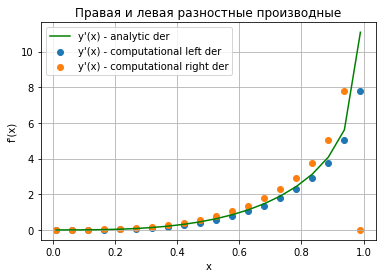

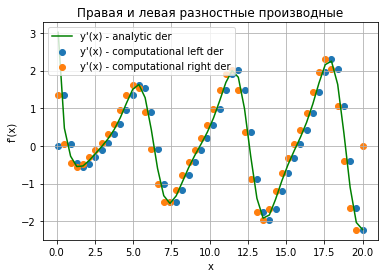

<Figure size 432x288 with 0 Axes>

In [ ]:
def show_left_right_derivatives(n_dots_amount, a, b, function, function_analytic_derivative):
    x_array = np.linspace(a, b, n_dots_amount)
    h_dots_step_size = (b - a) / n_dots_amount
    y_array = function(x_array)

    analytic_derivative = function_analytic_derivative(x_array)
    left_derivative_array = calculate_computational_left_derivative_dots_array(h_dots_step_size, n_dots_amount, y_array)
    right_derivative_array = calculate_computational_right_derivative_dots_array(h_dots_step_size, n_dots_amount, y_array)

    plt.title("Правая и левая разностные производные")
    ax = plt.gca()
    ax.set_xlabel('x')
    ax.set_ylabel('f\'(x)')
    ax.grid()

    plt.plot(x_array, analytic_derivative, 'g', label="y'(x) - analytic der")
    plt.scatter(x_array, left_derivative_array, label="y'(x) - computational left der")
    plt.scatter(x_array, right_derivative_array, label="y'(x) - computational right der")

    plt.legend()
    plt.show()
    plt.clf()


# for first function
n_dots_amount = 20
a = 0.01
b = 0.99
function = function_1
function_analytic_derivative = analytic_derivative_1

show_left_right_derivatives(n_dots_amount, a, b, function, function_analytic_derivative)

# for second function
n_dots_amount = 50
a = 0.1
b = 20.
function = function_2
function_analytic_derivative = analytic_derivative_2

show_left_right_derivatives(n_dots_amount, a, b, function, function_analytic_derivative)

Оба метода имеют точность $h$ первого порядка и задействуют 2 узла.
По графику $f_1(x)$ видно, что метод левой разностой производной оказывается ближе к линии аналитически вычисленной производной.

Для графика $f_2(x)$ всё не так очевидно: значения и левой, и правой производных близки к аналитической.

3. Центральная разностная производная

$f'(x)≃\frac{f(x+h)-f(x-h)}{2h}$

В этом методе задействуются 3 узла, и точность такого метода составляет уже 2 порядка: $h^2$

Формулы значения производных в крайних точках:

$f'(x_0)≃\frac{-3f(x_0)+4f(x_1)-f(x_2)}{2h}$

$f'(x_n)≃\frac{f(x_{n-2})-4f(x_{n-1})+3f(x_n)}{2h}$


Для демонстрации метода будем использовать те же формулы $f_1(x)$ и $f_2(x)$ и их аналитические производные.



In [ ]:
def calculate_central_derivative_y_i(i, y, h):
    y_i_dif = (y[i + 1] - y[i - 1]) / (2 * h)
    return y_i_dif


def calculate_derivative_y_first(y, h):
    first_derivative_dot = ((-3 * y[0]) + (4 * y[1]) - y[2]) / (2 * h)
    return first_derivative_dot


def calculate_derivative_y_last(y, n, h):
    last_derivative_dot = (y[n - 3] - (4 * y[n - 2]) + (3 * y[n - 1])) / (2 * h)
    return last_derivative_dot


def calculate_computational_central_derivative_dots_array(h, n, y):
    y_derivative_array = np.zeros(n)
    y_derivative_array[0] = calculate_derivative_y_first(y, h)

    for i in range(1, n - 1):
        y_derivative_array[i] = calculate_central_derivative_y_i(i, y, h)

    y_derivative_array[-1] = calculate_derivative_y_last(y, n, h)
    return y_derivative_array

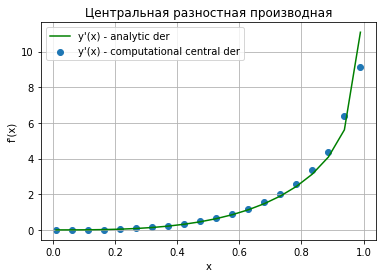

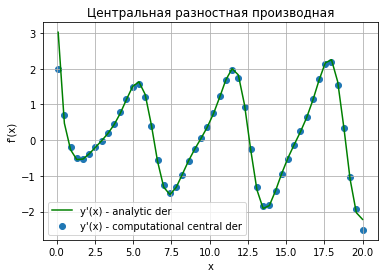

<Figure size 432x288 with 0 Axes>

In [ ]:
def show_central_derivative(n_dots_amount, a, b, function, function_analytic_derivative):
    x_array = np.linspace(a, b, n_dots_amount)
    h_dots_step_size = (b - a) / n_dots_amount
    y_array = function(x_array)

    analytic_derivative = function_analytic_derivative(x_array)
    central_derivative_array = calculate_computational_central_derivative_dots_array(h_dots_step_size, n_dots_amount,
                                                                                        y_array)

    plt.title("Центральная разностная производная")
    ax = plt.gca()
    ax.set_xlabel('x')
    ax.set_ylabel('f\'(x)')
    ax.grid()

    plt.plot(x_array, analytic_derivative, 'g', label="y'(x) - analytic der")
    plt.scatter(x_array, central_derivative_array, label="y'(x) - computational central der")

    plt.legend()
    plt.show()
    plt.clf()


# for first function
n_dots_amount = 20
a = 0.01
b = 0.99
function = function_1
function_analytic_derivative = analytic_derivative_1
show_central_derivative(n_dots_amount, a, b, function, function_analytic_derivative)

# for second function
n_dots_amount = 50
a = 0.1
b = 20.
function = function_2
function_analytic_derivative = analytic_derivative_2
show_central_derivative(n_dots_amount, a, b, function, function_analytic_derivative)

Как видно, центральная разностая производная ещё точнее прилегает к аналитической производной для обеих функций, чем производные из предыдущих двух методах.

Для наглядности рассмотрим график со всеми тремя методами и ананлитической производной:

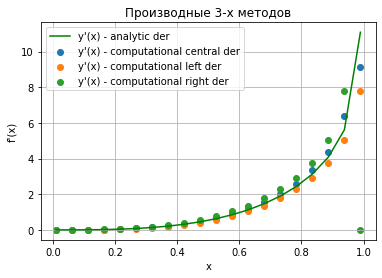

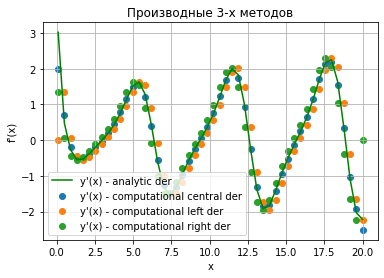

<Figure size 432x288 with 0 Axes>

In [ ]:
def show_all_derivatives(n_dots_amount, a, b, function, function_analytic_derivative):
    x_array = np.linspace(a, b, n_dots_amount)
    h_dots_step_size = (b - a) / n_dots_amount
    y_array = function(x_array)

    analytic_derivative = function_analytic_derivative(x_array)
    central_derivative_array = calculate_computational_central_derivative_dots_array(h_dots_step_size, n_dots_amount,
                                                                                        y_array)
    left_derivative_array = calculate_computational_left_derivative_dots_array(h_dots_step_size, n_dots_amount, y_array)
    right_derivative_array = calculate_computational_right_derivative_dots_array(h_dots_step_size, n_dots_amount, y_array)

    plt.title("Производные 3-х методов")
    ax = plt.gca()
    ax.set_xlabel('x')
    ax.set_ylabel('f\'(x)')
    ax.grid()

    plt.plot(x_array, analytic_derivative, 'g', label="y'(x) - analytic der")
    plt.scatter(x_array, central_derivative_array, label="y'(x) - computational central der")
    plt.scatter(x_array, left_derivative_array, label="y'(x) - computational left der")
    plt.scatter(x_array, right_derivative_array, label="y'(x) - computational right der")

    plt.legend()
    plt.show()
    plt.clf()


# for first function
n_dots_amount = 20
a = 0.01
b = 0.99
function = function_1
function_analytic_derivative = analytic_derivative_1
show_all_derivatives(n_dots_amount, a, b, function, function_analytic_derivative)

# for second function
n_dots_amount = 50
a = 0.1
b = 20.
function = function_2
function_analytic_derivative = analytic_derivative_2
show_all_derivatives(n_dots_amount, a, b, function, function_analytic_derivative)

Чтобы более формально, а не просто "на глаз" сравнить точность реализованных методов, найдем среднеквадратичные отклонения численных от истинных значений
производной:

$\sigma = \sqrt{\frac{\sum\limits_{i=1}^n (f_{comput}'(x_i)-f_{analytic}'(x_i))^2}{n}}$

Вычислим ско для трех методов при исходном $h$, затем будем уменьшать значение $h$ в $2, 4, 8, 16 $ раз.

In [ ]:
def calculate_sko(values):

    n = len(values)
    sum_sqr_value = 0.0
    for i in range(1, n - 1):
        sum_sqr_value += values[i] ** 2

    sko = np.sqrt(sum_sqr_value / (n - 2))

    return sko

y'(x) sko - central: [0.03914355 0.01700983 0.00741835 0.00337404 0.00159858]
y'(x) sko - right: [0.15705415 0.08289757 0.04259093 0.02157438 0.01085488]
y'(x) sko - left: [0.07918292 0.04960368 0.02856772 0.01547477 0.00807516]


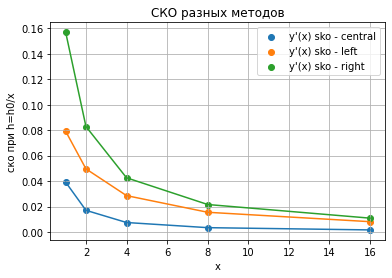

y'(x) sko - central: [0.01975826 0.00923528 0.00403632 0.00172956 0.00078678]
y'(x) sko - right: [0.14957205 0.07725717 0.04025026 0.02088101 0.01071105]
y'(x) sko - left: [0.1625925  0.08434179 0.04328976 0.02196071 0.01105964]


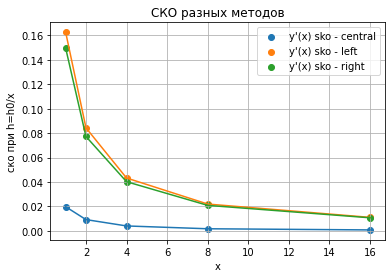

<Figure size 432x288 with 0 Axes>

In [ ]:
import math as mt

def show_sko(n_dots_amount, a, b, function, function_analytic_derivative):

    x_array = np.linspace(a, b, n_dots_amount)
    h_dots_step_size = (b - a) / n_dots_amount
    y_array = function(x_array)

    analytic_derivative = function_analytic_derivative(x_array)
    central_derivative_array = calculate_computational_central_derivative_dots_array(h_dots_step_size, n_dots_amount,
                                                                                        y_array)
    left_derivative_array = calculate_computational_left_derivative_dots_array(h_dots_step_size, n_dots_amount, y_array)
    right_derivative_array = calculate_computational_right_derivative_dots_array(h_dots_step_size, n_dots_amount, y_array)

    n_dots_amount = 100

    sko_n = 5
    sko_array = np.zeros(sko_n)
    for i in range(sko_n):
        sko_array[i] = 2 ** i

    central_derivative_sko = np.zeros(sko_n)
    left_derivative_sko = np.zeros(sko_n)
    right_derivative_sko = np.zeros(sko_n)
    h_dots_steps = np.zeros(sko_n)

    cur_n_dots_amount = n_dots_amount
    for i in range(sko_n):
        cur_n_dots_amount = int(n_dots_amount * sko_array[i])
        x_array = np.linspace(a, b, cur_n_dots_amount)
        h_dots_step_size = (b - a) / cur_n_dots_amount
        h_dots_steps[i] = h_dots_step_size
        y_array = function(x_array)

        analytic_derivative = function_analytic_derivative(x_array)
        central_derivative_array = calculate_computational_central_derivative_dots_array(h_dots_step_size, cur_n_dots_amount,
                                                                                        y_array)
        left_derivative_array = calculate_computational_left_derivative_dots_array(h_dots_step_size, cur_n_dots_amount, y_array)
        right_derivative_array = calculate_computational_right_derivative_dots_array(h_dots_step_size, cur_n_dots_amount,
                                                                                    y_array)
        central_derivative_sko[i] = calculate_sko(central_derivative_array - analytic_derivative)
        left_derivative_sko[i] = calculate_sko(left_derivative_array - analytic_derivative)
        right_derivative_sko[i] = calculate_sko(right_derivative_array - analytic_derivative)

    print('y\'(x) sko - central:', central_derivative_sko)
    print('y\'(x) sko - right:', right_derivative_sko)
    print('y\'(x) sko - left:', left_derivative_sko)

    plt.title("СКО разных методов")
    ax = plt.gca()
    ax.set_xlabel('x')
    ax.set_ylabel('ско при h=h0/x')
    ax.grid()

    plt.scatter(sko_array, central_derivative_sko, label="y'(x) sko - central")
    plt.plot(sko_array, central_derivative_sko)
    plt.scatter(sko_array, left_derivative_sko, label="y'(x) sko - left")
    plt.plot(sko_array, left_derivative_sko)
    plt.scatter(sko_array, right_derivative_sko, label="y'(x) sko - right")
    plt.plot(sko_array, right_derivative_sko)

    plt.legend()
    plt.show()
    plt.clf()


# for first function
n_dots_amount = 20
a = 0.01
b = 0.99
function = function_1
function_analytic_derivative = analytic_derivative_1
show_sko(n_dots_amount, a, b, function, function_analytic_derivative)

# for second function
n_dots_amount = 50
a = 0.1
b = 20.
function = function_2
function_analytic_derivative = analytic_derivative_2
show_sko(n_dots_amount, a, b, function, function_analytic_derivative)

График ско подтверждает все наши рассуждения и предположения: самый точный метод - центральная разностная производная, для левой и правой разностной производных ско отличается в зависимости от исходной функции, но все же значения довольно близки друг к другу и разница в ско становится всё меньше при увеличении количетсва узлов, а следовательно при уменьшении шага $h$. Так же при при уменьшении шага $h$ ско всех 3 методов всё больше приближается к 0.

Теперь рассмотрим методы численного интегрирования. Все они основываются на разбиении криволинейной трапеции на части и последующем нахождении площадей этих частей. Сумма полученных площадей и будет равна интегралу, полученному численным методом. Методы отличаются друг от друга способом выбора частей, на которые мы разбиваем криволинейную трапецию.

Рассмотрим две функции и найдём их интегралы аналитически.

$f_1$ = $x^2$

$F_1$ = $\frac{x^3}{3}+C$

$f_2$ = $cos(x)$

$F_2$ = $sin(x)+C$

Для начала рассмотрим три метода, связанных между собой — формулы прямоугольников. В этом методе криволинейная трапеция разбивается на прямоугольники, и единственное различие — выбор точки, которая будет определять высоту прямоугольника. Так, выбирая левые точки, мы будем использовать метод левых прямоугольников, выбирая правые — метод правых прямоугольников, выбирая точки посередние — метод средних прямоугольников. Площадь каждой части рассчитывается по формуле:

1.   $I_i$≃$h⋅f_{i-1}$ — левые прямоугольники
2.   $I_i$≃$h⋅f_{i}$ — правые прямоугольники
3.   $I_i$≃$h⋅f_{i-1/2}$ — средние прямоугольники

Визуализацию этого метода на рассматриваемых нами функциях можно увидеть по ссылке: https://www.desmos.com/calculator/3tqofkpb0r

Расчёт в Python:

In [ ]:
import numpy as np

def left_rectangle(f, a, b, n):
  result = 0.0;
  h = 1.0*(b-a)/n
  for i in range(1,n):
    result += h*f(a + h*(i-1))
  return result

def right_rectangle(f, a, b, n):
  result = 0.0;
  h = 1.0*(b-a)/n
  for i in range(1,n):
    result += h*f(a + h*i)
  return result

def central_rectangle(f, a, b, n):
  result = 0.0;
  h = 1.0*(b-a)/n
  for i in range(1,n):
    result += h*f(a + h*(i-0.5))
  return result

def function_1(x):
  return x**2

def analytic_1(x):
  return x**3/3

def function_2(x):
  return np.cos(x)

def analytic_2(x):
  return np.sin(x)

a = 0
b = 5
n = 100
analytic_value_1 = analytic_1(b) - analytic_1(a)
analytic_value_2 = analytic_2(b) - analytic_2(a)

print('Function 1')

numeric_value_left_1 = left_rectangle(function_1, a, b, n)
left_rectangle_deviation_1 = np.abs(numeric_value_left_1 - analytic_value_1) / np.abs(analytic_value_1) * 100
print('Analytical: ' + str(analytic_value_1) + ' Left rectangle method: ' + str(
    numeric_value_left_1) + ' Percent of deviation: ' + str(round((left_rectangle_deviation_1), 2)) + '%')

numeric_value_right_1 = right_rectangle(function_1, a, b, n)
right_rectangle_deviation_1 = np.abs(numeric_value_right_1 - analytic_value_1) / np.abs(analytic_value_1) * 100
print('Analytical: ' + str(analytic_value_1) + ' Right rectangle method: ' + str(
    numeric_value_right_1) + ' Percent of deviation: ' + str(round((right_rectangle_deviation_1), 2)) + '%')

numeric_value_central_1 = central_rectangle(function_1, a, b, n)
central_rectangle_deviation_1 = np.abs(numeric_value_central_1 - analytic_value_1) / np.abs(analytic_value_1) * 100
print('Analytical: ' + str(analytic_value_1) + ' Central rectangle method: ' + str(
    numeric_value_central_1) + ' Percent of deviation: ' + str(round((central_rectangle_deviation_1), 2)) + '%')

print('---')
print('Function 2')

numeric_value_left_2 = left_rectangle(function_2, a, b, n)
left_rectangle_deviation_2 = np.abs(numeric_value_left_2 - analytic_value_2) / np.abs(analytic_value_2) * 100
print('Analytical: ' + str(analytic_value_2) + ' Left rectangle method: ' + str(
    numeric_value_left_2) + ' Percent of deviation: ' + str(round((left_rectangle_deviation_2), 2)) + '%')

numeric_value_right_2 = right_rectangle(function_2, a, b, n)
right_rectangle_deviation_2 = np.abs(numeric_value_right_2 - analytic_value_2) / np.abs(analytic_value_2) * 100
print('Analytical: ' + str(analytic_value_2) + ' Right rectangle method: ' + str(
    numeric_value_right_2) + ' Percent of deviation: ' + str(round((right_rectangle_deviation_2), 2)) + '%')

numeric_value_central_2 = central_rectangle(function_2, a, b, n)
central_rectangle_deviation_2 = np.abs(numeric_value_central_2 - analytic_value_2) / np.abs(analytic_value_2) * 100
print('Analytical: ' + str(analytic_value_2) + ' Central rectangle method: ' + str(
    numeric_value_central_2) + ' Percent of deviation: ' + str(round((central_rectangle_deviation_2), 2)) + '%')

Function 1
Analytical: 41.666666666666664 Left rectangle method: 39.818625 Percent of deviation: 4.44%
Analytical: 41.666666666666664 Right rectangle method: 41.043749999999996 Percent of deviation: 1.5%
Analytical: 41.666666666666664 Central rectangle method: 40.42809375000001 Percent of deviation: 2.97%
---
Function 2
Analytical: -0.9589242746631385 Left rectangle method: -0.9525851172323957 Percent of deviation: 0.66%
Analytical: -0.9589242746631385 Right rectangle method: -0.990816045084673 Percent of deviation: 3.33%
Analytical: -0.9589242746631385 Central rectangle method: -0.9720043166874466 Percent of deviation: 1.36%


Как можно заметить, полученные численно значения действительно "похожи" на аналитическое значение интеграла на отрезке [a, b]. При этом значение для средних прямоугольников показывает лучшие результаты, чем для левых или правых при тех же входных значениях и количестве разбиений.

Рассмотрим ещё один метод численного нахождения значения интеграла на отрезке. Метод трапеций заключается в том, что мы берём оба конца части криволинейной трапеции и соединяем их линией, получая новую трапецию. Площадь этой трапеции будем считать площадью рассматриваемой части.

$I_i$≃$\frac{h}{2}(f_{i-1}+f_{i})$

Визуализация метода на первой функции (можно вставить любую) в десмосе: https://www.desmos.com/calculator/v1rcgreivi

Реализация в Python:

In [ ]:
def trapezoid(f, a, b, n):
  result = 0.0
  h = 1.0*(b-a)/n
  for i in range(1,n):
    result += h/2 * (f(a + h*(i-1)) + f(a + h*i))
  return result

print('Function 1')

numeric_value_trapezoid_1 = trapezoid(function_1, a, b, n)
trapezoid_deviation_1 = np.abs(numeric_value_trapezoid_1 - analytic_value_1) / np.abs(analytic_value_1) * 100
print('Analytical: ' + str(analytic_value_1) + ' Trapezoid method: ' + str(
    numeric_value_trapezoid_1) + ' Percent of deviation: ' + str(round((trapezoid_deviation_1), 2)) + '%')

print('---')
print('Function 2')

numeric_value_trapezoid_2 = trapezoid(function_2, a, b, n)
trapezoid_deviation_2 = np.abs(numeric_value_trapezoid_2 - analytic_value_2) / np.abs(analytic_value_2) * 100
print('Analytical: ' + str(analytic_value_2) + ' Trapezoid method: ' + str(
    numeric_value_trapezoid_2) + ' Percent of deviation: ' + str(round((trapezoid_deviation_2), 2)) + '%')

Function 1
Analytical: 41.666666666666664 Trapezoid method: 40.43118750000001 Percent of deviation: 2.97%
---
Function 2
Analytical: -0.9589242746631385 Trapezoid method: -0.9717005811585342 Percent of deviation: 1.33%


Как можно заметить, метод трапеций также показывает достаточно близкие к аналитическим значения.

Рассмотрим третий метод численного интегрирования, метод Симпсона. В каждой части помимо точек границ мы также выбираем точку внутри части, чтобы в итоге у нас получилось по три точки на часть. Через три точки мы можем провести параболу, после чего получаем и рассчитываем площадь пространства под параболой.

$I_i$≃$\frac{h}{6}(f_{i-1}+4f_{i-1/2}+f_i)$

Реализация в Python:

In [ ]:
def simpson(f, a, b, n):
  result = 0.0
  h = 1.0*(b-a)/n
  for i in range(1, n):
    result += h/6*(f(a + h*(i-1)) + 4 * f(a + h*(i-0.5)) + f(a + h*i))
  return result

print('Function 1')

numeric_value_simpson_1 = simpson(function_1, a, b, n)
simpson_deviation_1 = np.abs(numeric_value_simpson_1 - analytic_value_1) / np.abs(analytic_value_1) * 100
print('Analytical: ' + str(analytic_value_1) + ' Simpson method: ' + str(
    numeric_value_simpson_1) + ' Percent of deviation: ' + str(round((simpson_deviation_1), 2)) + '%')

print('---')
print('Function 2')

numeric_value_simpson_2 = simpson(function_2, a, b, n)
simpson_deviation_2 = np.abs(numeric_value_simpson_2 - analytic_value_2) / np.abs(analytic_value_2) * 100
print('Analytical: ' + str(analytic_value_2) + ' Simpson method: ' + str(
    numeric_value_simpson_2) + ' Percent of deviation: ' + str(round((simpson_deviation_2), 2)) + '%')

Function 1
Analytical: 41.666666666666664 Simpson method: 40.429125000000006 Percent of deviation: 2.97%
---
Function 2
Analytical: -0.9589242746631385 Simpson method: -0.9719030715111424 Percent of deviation: 1.35%


Как видно, результаты также получаются достаточно близкими к аналитическому, а также похожи на результаты, полученные в методе трапеций.

Сравним все рассмотренные методы и их эффективность, рассмотрев величину отклонения полученного численного результата от аналитического. Также проследим за изменением отклонения при уменьшении шага (при увеличении количества частей).

n = 100   h = 0.05
Left rectangle:   1)4.44%   2)0.66%
Right rectangle:   1)1.5%   2)3.33%
Central rectangle:   1)2.97%   2)1.36%
Trapezoid:   1)2.97%   2)1.33%
Simpson:   1)2.97%   2)1.35%
---
n = 200   h = 0.025
Left rectangle:   1)2.23%   2)0.26%
Right rectangle:   1)0.75%   2)1.67%
Central rectangle:   1)1.49%   2)0.71%
Trapezoid:   1)1.49%   2)0.7%
Simpson:   1)1.49%   2)0.71%
---
n = 400   h = 0.0125
Left rectangle:   1)1.12%   2)0.11%
Right rectangle:   1)0.37%   2)0.84%
Central rectangle:   1)0.75%   2)0.36%
Trapezoid:   1)0.75%   2)0.36%
Simpson:   1)0.75%   2)0.36%
---
n = 800   h = 0.00625
Left rectangle:   1)0.56%   2)0.05%
Right rectangle:   1)0.19%   2)0.42%
Central rectangle:   1)0.37%   2)0.18%
Trapezoid:   1)0.37%   2)0.18%
Simpson:   1)0.37%   2)0.18%
---
n = 1600   h = 0.003125
Left rectangle:   1)0.28%   2)0.03%
Right rectangle:   1)0.09%   2)0.21%
Central rectangle:   1)0.19%   2)0.09%
Trapezoid:   1)0.19%   2)0.09%
Simpson:   1)0.19%   2)0.09%
---


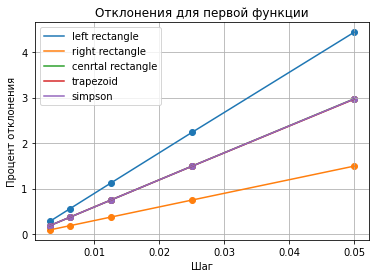

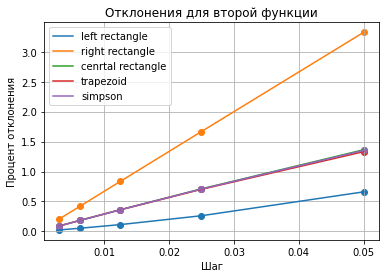

In [ ]:
import matplotlib.pyplot as plt

left_rectangle_deviation_arr_1 = np.zeros(5)
right_rectangle_deviation_arr_1 = np.zeros(5)
central_rectangle_deviation_arr_1 = np.zeros(5)
trapezoid_deviation_arr_1 = np.zeros(5)
simpson_deviation_arr_1 = np.zeros(5)
left_rectangle_deviation_arr_2 = np.zeros(5)
right_rectangle_deviation_arr_2 = np.zeros(5)
central_rectangle_deviation_arr_2 = np.zeros(5)
trapezoid_deviation_arr_2 = np.zeros(5)
simpson_deviation_arr_2 = np.zeros(5)
h_array = np.zeros(5)
n=100

def find_deviation_percent(analytic_f, given_f, numeric_f, a, b, n):
  return np.abs(numeric_f(given_f, a, b, n) - analytic_f(b) + analytic_f(a)) / np.abs(analytic_f(b) - analytic_f(a)) * 100

for i in range(5):
  print('n = ' + str(n) + '   h = ' + str(1.0*(b-a)/n))
  h_array[i] = 1.0*(b-a)/n
  left_rectangle_deviation_arr_1[i] = find_deviation_percent(analytic_1, function_1, left_rectangle, a, b, n)
  left_rectangle_deviation_arr_2[i] = find_deviation_percent(analytic_2, function_2, left_rectangle, a, b, n)
  print('Left rectangle:   1)' + str(round(left_rectangle_deviation_arr_1[i],2)) + '%   2)' + str(round(left_rectangle_deviation_arr_2[i],2)) + '%')

  right_rectangle_deviation_arr_1[i] = find_deviation_percent(analytic_1, function_1, right_rectangle, a, b, n)
  right_rectangle_deviation_arr_2[i] = find_deviation_percent(analytic_2, function_2, right_rectangle, a, b, n)
  print('Right rectangle:   1)' + str(round(right_rectangle_deviation_arr_1[i],2)) + '%   2)' + str(round(right_rectangle_deviation_arr_2[i],2)) + '%')

  central_rectangle_deviation_arr_1[i] = find_deviation_percent(analytic_1, function_1, central_rectangle, a, b, n)
  central_rectangle_deviation_arr_2[i] = find_deviation_percent(analytic_2, function_2, central_rectangle, a, b, n)
  print('Central rectangle:   1)' + str(round(central_rectangle_deviation_arr_1[i],2)) + '%   2)' + str(round(central_rectangle_deviation_arr_2[i],2)) + '%')

  trapezoid_deviation_arr_1[i] = find_deviation_percent(analytic_1, function_1, trapezoid, a, b, n)
  trapezoid_deviation_arr_2[i] = find_deviation_percent(analytic_2, function_2, trapezoid, a, b, n)
  print('Trapezoid:   1)' + str(round(trapezoid_deviation_arr_1[i],2)) + '%   2)' + str(round(trapezoid_deviation_arr_2[i],2)) + '%')

  simpson_deviation_arr_1[i] = find_deviation_percent(analytic_1, function_1, simpson, a, b, n)
  simpson_deviation_arr_2[i] = find_deviation_percent(analytic_2, function_2, simpson, a, b, n)
  print('Simpson:   1)' + str(round(simpson_deviation_arr_1[i],2)) + '%   2)' + str(round(simpson_deviation_arr_2[i],2)) + '%')
  n = n*2
  print('---')

plt.title("Отклонения для первой функции")
ax = plt.gca()
ax.set_xlabel('Шаг')
ax.set_ylabel('Процент отклонения')
ax.grid()
plt.scatter(h_array, left_rectangle_deviation_arr_1)
plt.plot(h_array, left_rectangle_deviation_arr_1, label="left rectangle")
plt.scatter(h_array, right_rectangle_deviation_arr_1)
plt.plot(h_array, right_rectangle_deviation_arr_1, label="right rectangle")
plt.scatter(h_array, central_rectangle_deviation_arr_1)
plt.plot(h_array, central_rectangle_deviation_arr_1, label="cenrtal rectangle")
plt.scatter(h_array, trapezoid_deviation_arr_1)
plt.plot(h_array, trapezoid_deviation_arr_1, label="trapezoid")
plt.scatter(h_array, simpson_deviation_arr_1)
plt.plot(h_array, simpson_deviation_arr_1, label="simpson")
plt.legend()
plt.show()

plt.title("Отклонения для второй функции")
ax = plt.gca()
ax.set_xlabel('Шаг')
ax.set_ylabel('Процент отклонения')
ax.grid()
plt.scatter(h_array, left_rectangle_deviation_arr_2)
plt.plot(h_array, left_rectangle_deviation_arr_2, label="left rectangle")
plt.scatter(h_array, right_rectangle_deviation_arr_2)
plt.plot(h_array, right_rectangle_deviation_arr_2, label="right rectangle")
plt.scatter(h_array, central_rectangle_deviation_arr_2)
plt.plot(h_array, central_rectangle_deviation_arr_2, label="cenrtal rectangle")
plt.scatter(h_array, trapezoid_deviation_arr_2)
plt.plot(h_array, trapezoid_deviation_arr_2, label="trapezoid")
plt.scatter(h_array, simpson_deviation_arr_2)
plt.plot(h_array, simpson_deviation_arr_2, label="simpson")
plt.legend()
plt.show()

Как можно заметить, для первой функции самым точным методом стал метод правых прямоугольников, а для второй — левых прямоугольников, при этом в случае с самыми неточными методами ситуация обратная. Методы же средних прямоугольников, трапеций и Симпсона в обоих случаях показывают одинаково неплохой результат. Первая функция на выбранном отрезке возрастающая, поэтому для неё метод правых прямоугольников стал точнее, а левых — наоборот. Та же ситуация со второй функцией, которая на выбранном отрезке убывает.
В общем, лучшие результаты показали методы средних прямоугольников, трапеций и метод Симпсона. При этом с уменьшением размера шага точность заметно возрастает и стремится к нулю, тогда как с ростом размера шага отклонение от аналитического значения будет расти.